In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('social_network.csv')

In [4]:
df.head()

,user_id,account_creation_date,account_status,login_activity,posting_activity,social_connections,suspicious_activity
0,1,2021-01-01 00:00:00.000000000,active,49,30,40,0
1,2,2021-01-02 13:14:38.929765886,inactive,4,43,278,1
2,3,2021-01-04 02:29:17.859531772,active,24,43,704,1
3,4,2021-01-05 15:43:56.789297658,active,92,16,394,1
4,5,2021-01-07 04:58:35.719063545,active,56,4,361,0


In [6]:
df.isna().sum()
# No null values 

user_id                  0
account_creation_date    0
account_status           0
login_activity           0
posting_activity         0
social_connections       0
suspicious_activity      0
dtype: int64

In [7]:
df[df.duplicated()]
# no duplicates

,user_id,account_creation_date,account_status,login_activity,posting_activity,social_connections,suspicious_activity


In [8]:
df.columns = df.columns.str.strip()

In [9]:
df1 = df.select_dtypes(include = ['int','float'])

In [10]:
dicti = {}

for i in df1.columns:


    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]

C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_27404\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_27404\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dicti[i] = df1[(df1[i] < lower_limit) | (df1[i] > upper_limit)].count()[0]
C:\Users\shreyas.sridharan.lv\AppData\Local\Temp\ipykernel_27404\2289933199.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

In [11]:
dicti
# No outliers 

{'user_id': 0,
 'login_activity': 0,
 'posting_activity': 0,
 'social_connections': 0,
 'suspicious_activity': 0}

In [12]:
df.describe()

,user_id,login_activity,posting_activity,social_connections,suspicious_activity
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,51.200000,26.773333,511.910000,0.513333
std,86.746758,29.913812,13.922214,291.843297,0.500657
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,75.750000,25.000000,15.750000,244.750000,0.000000
50%,150.500000,52.000000,27.000000,531.500000,1.000000
75%,225.250000,79.000000,39.000000,775.500000,1.000000
max,300.000000,99.000000,49.000000,990.000000,1.000000


<Axes: xlabel='login_activity', ylabel='posting_activity'>

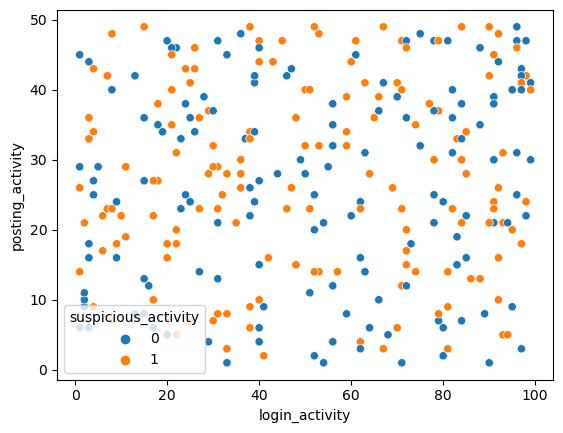

In [13]:
sns.scatterplot(data = df, x = 'login_activity', y = 'posting_activity', hue = 'suspicious_activity')

<Axes: xlabel='account_status', ylabel='social_connections'>

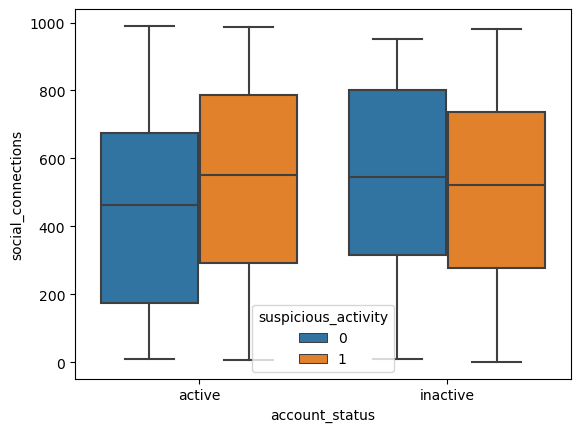

In [14]:
sns.boxplot(data = df, x = 'account_status', y = 'social_connections', hue = 'suspicious_activity')

In [15]:
df.shape 

(300, 7)

In [16]:
df.columns

Index(['user_id', 'account_creation_date', 'account_status', 'login_activity',
       'posting_activity', 'social_connections', 'suspicious_activity'],
      dtype='object')

In [17]:
X = df[[ 'login_activity',
       'posting_activity', 'social_connections']]

In [18]:
X

,login_activity,posting_activity,social_connections
0,49,30,40
1,4,43,278
2,24,43,704
3,92,16,394
4,56,4,361
...,...,...,...
295,72,12,109
296,17,27,177
297,72,17,511
298,47,43,480


In [19]:
I_forest = IsolationForest()

In [20]:
I_forest.fit(X)

IsolationForest()

In [21]:
pred = I_forest.predict(X)

In [23]:
df['anomaly score'] = I_forest.decision_function(X)

In [25]:
anomaly_points = df[df['anomaly score'] < 0]

In [28]:
df['Anomaly'] = df['anomaly score'].apply(lambda x: 'Anomaly' if x<0 else 'Not Anomaly')

<Axes: xlabel='social_connections', ylabel='anomaly score'>

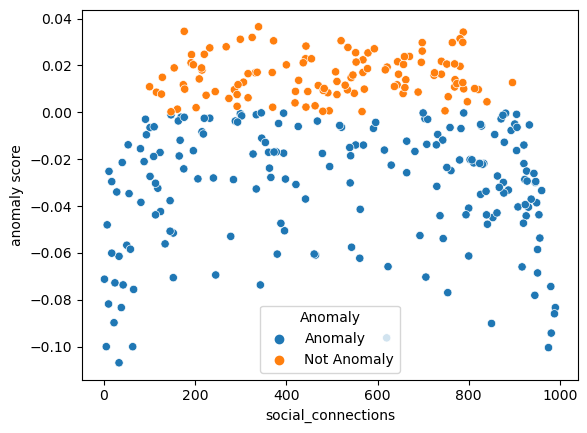

In [30]:
sns.scatterplot(data = df, x = 'social_connections', y = 'anomaly score', hue = 'Anomaly')